# BEAMFORMING

https://pysdr.org/content/doa.html

## Create base signal tx_signal with f = 20kHz
$$ tx\_signal = {e^{j2\pi ft}} = cos(2\pi ft) + j \ sin(2\pi ft) $$ 
<p style="text-align:center;">with<p>

$$ \phi = 0 $$ 

In [2]:
# Parameters
antena_spacing = 0.5 # half wavelength spacing
antena_rx_nbr = 5
theta_degrees = 45 # direction of arrival (feel free to change this, it's arbitrary)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
N = 10000 # number of samples to simulate

In [4]:
# Create tx signal
t = np.arange(N)/sample_rate
f_tone = 0.02e6
tx_signal = np.exp(2j * np.pi * f_tone * t)

In [5]:
# Create rx signals
theta = np.radians(theta_degrees) # convert to radians

steering_vectors = np.exp(-2j * np.pi * antena_spacing * np.arange(antena_rx_nbr) * np.sin(theta)) # Steering Vector

steering_vectors = steering_vectors.reshape(-1,1) # make steering_vectors a column vector
tx_signal = tx_signal.reshape(1,-1) # make tx_signal a row vector

rx_signals = steering_vectors * tx_signal # Simulate the received signal rx_signals through a matrix multiply

n = np.random.randn(antena_rx_nbr, N) + 1j*np.random.randn(antena_rx_nbr, N)
rx_signals = rx_signals + 0.5*n # rx_signals and n are both 3x10000

In [6]:
# Beamforming
theta_scan = np.linspace(-1*np.pi, np.pi, 1000) # 1000 different thetas between -180 and +180 degrees
results = []
for theta_i in theta_scan:
   w = np.exp(-2j * np.pi * antena_spacing * np.arange(antena_rx_nbr) * np.sin(theta_i)) # Conventional, aka delay-and-sum, beamformer
   X_weighted = w.conj().T @ rx_signals # apply our weights. remember rx_signals is 3x10000
   results.append(10*np.log10(np.var(X_weighted))) # power in signal, in dB so its easier to see small and large lobes at the same time
results -= np.max(results) # normalize (optional)

134.95495495495493


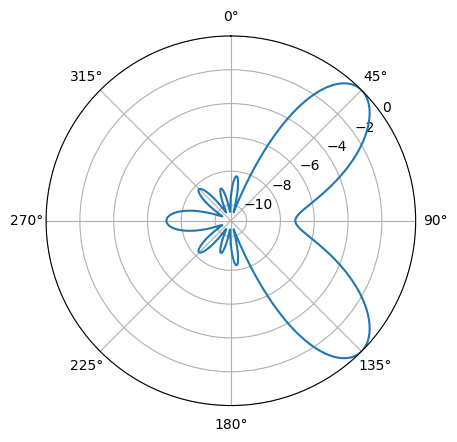

In [7]:
# print angle that gave us the max value
print(theta_scan[np.argmax(results)] * 180 / np.pi) # 19.99999999999998

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_scan, results) # MAKE SURE TO USE RADIAN FOR POLAR
ax.set_theta_zero_location('N') # make 0 degrees point up
ax.set_theta_direction(-1) # increase clockwise
ax.set_rlabel_position(55)  # Move grid labels away from other labels
plt.show()